In [3]:
import pandas as pd
import numpy as np
mushroom_data = pd.read_csv('C:/Users/이주환/Desktop/SSU/2학기/AI와머신러닝/mushroom_project/mushrooms.csv')
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in mushroom_data.columns :
    mushroom_data[column] = encoder.fit_transform(mushroom_data[column])
mushroom_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [8]:
mushroom_numpy = mushroom_data.to_numpy()
mushroom_input = mushroom_numpy[:,1:]
mushroom_target = mushroom_numpy[:,0]

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(mushroom_input, mushroom_target, train_size = 0.7, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_input_scaled = ss.fit_transform(train_input)
test_input_scaled = ss.fit_transform(test_input)

In [13]:
from sklearn.linear_model import LogisticRegression
lr_before = LogisticRegression(max_iter = 1000, random_state=42)
history_before = lr_before.fit(train_input_scaled,train_target)
print(lr_before.score(train_input_scaled, train_target))
print(lr_before.score(test_input_scaled, test_target))

0.9516355962011959
0.9536505332239541


In [17]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(train_input_scaled, train_target)
print('회귀 계수 : ', lasso.coef_)

회귀 계수 :  [ 0.          0.          0.         -0.10890501 -0.          0.
 -0.09646255  0.10029006 -0.04027345 -0.         -0.         -0.03297679
 -0.         -0.         -0.          0.          0.         -0.
 -0.         -0.          0.          0.        ]


In [54]:
selected_features = np.where(lasso.coef_ != 0)[0]
train_input_selected = train_input_scaled[:, selected_features]
test_input_selected = test_input_scaled[:, selected_features]
train_input_selected

array([[ 1.18543045, -0.43507579, -0.66541793, -0.51156589,  0.68484555],
       [ 1.18543045, -0.43507579, -0.66541793,  0.61248537,  0.68484555],
       [-0.84357543, -0.43507579, -0.66541793,  0.61248537, -0.9242585 ],
       ...,
       [ 1.18543045, -0.43507579, -0.66541793,  1.45552382,  0.68484555],
       [-0.84357543, -0.43507579,  1.50281493, -1.35460433,  0.68484555],
       [-0.84357543,  2.29845011, -0.66541793, -0.7925787 ,  0.68484555]])

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
lr = LogisticRegression(max_iter = 1000, random_state = 42)
lr.fit(train_input_scaled,train_target.ravel())
pred = lr.predict(test_input_scaled)
score = accuracy_score(test_target, pred)
print(score)

0.9536505332239541


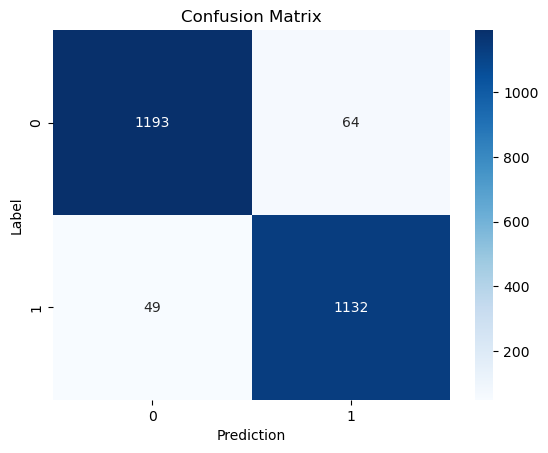

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(test_target, pred)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()